## Tarea
Va a consistir de 4 pasos basados en lo que aprendimos de como manipular los INEGI shape files.

## Primero
#### Vas a escoger 5 estados y vas a graficar sus vecinos como vimos en el otro archivo. A cada uno de estos grupos los llamaremos grupos de estados.
#### Usa el shapefile de los estados


In [17]:
import geopandas as gpd
path_estados = '/Users/juancasasmartinez/Documents/ITAM/Fuentes/proyectos_finales/proyecto_shp/ShapeFilesFiles/Estados/conjunto_de_datos/00ent.shp'
gdf_estados = gpd.read_file(path_estados)
gdf_estados.head()

,CVEGEO,CVE_ENT,NOMGEO,geometry
0,01,01,Aguascalientes,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
1,02,02,Baja California,"MULTIPOLYGON (((1313480.513 1831458.607, 13135..."
2,03,03,Baja California Sur,"MULTIPOLYGON (((1694656.344 1227647.637, 16946..."
3,04,04,Campeche,"MULTIPOLYGON (((3544897.199 946994.621, 354491..."
4,05,05,Coahuila de Zaragoza,"POLYGON ((2469954.193 1978522.993, 2469982.807..."


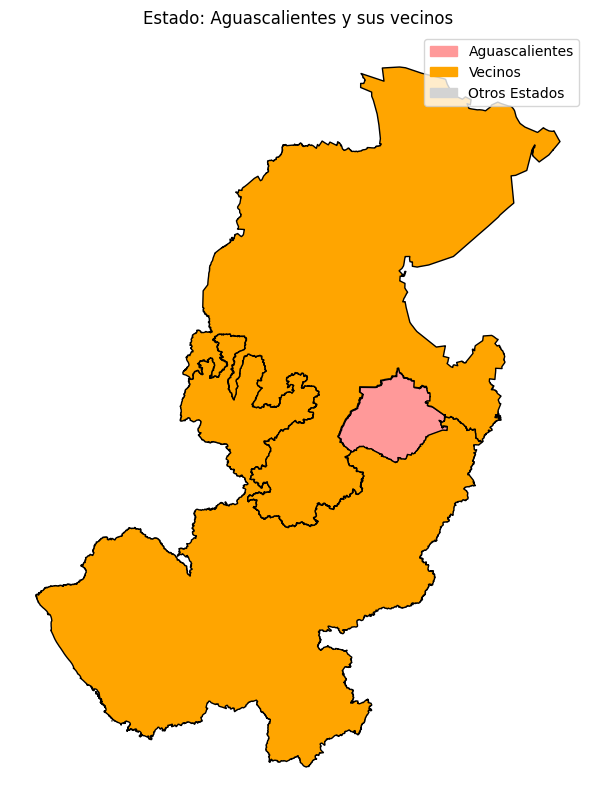

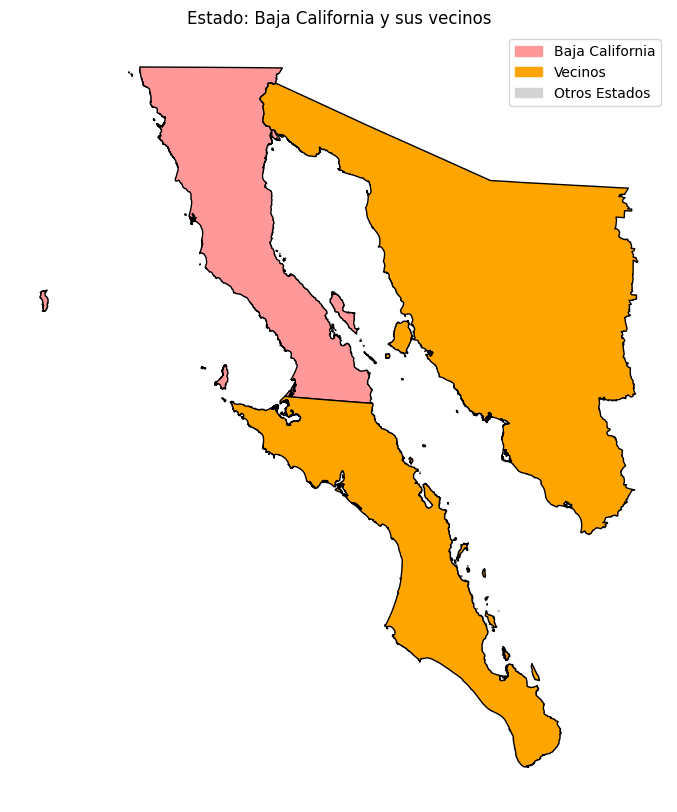

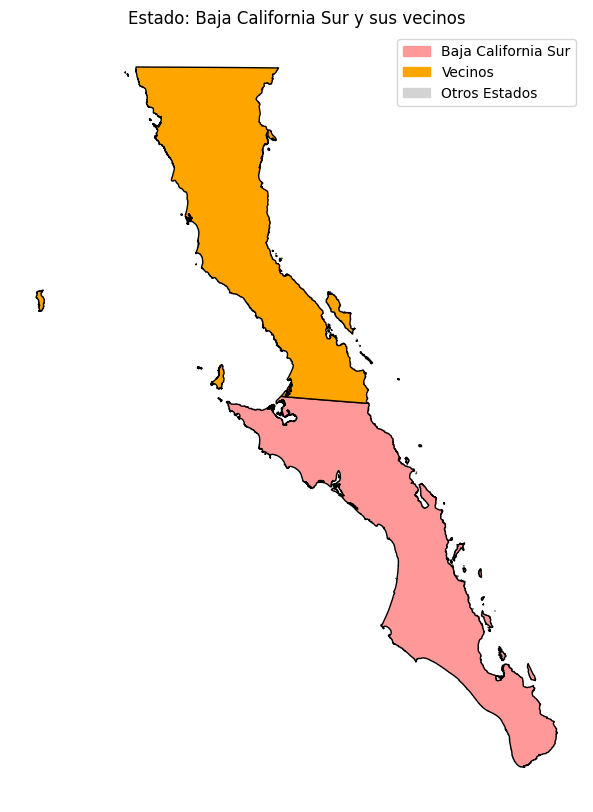

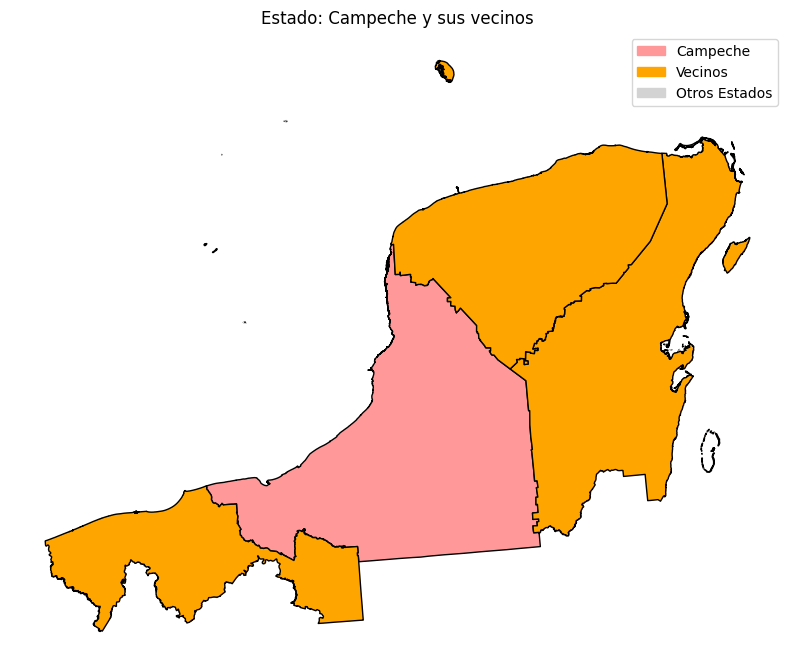

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

estados = ['Aguascalientes', 'Baja California', 'Baja California Sur', 'Campeche', 'Coahuila']
gdf_estados_5 = gdf_estados[gdf_estados['NOMGEO'].isin(estados)]


grupos_de_estados = {}

for index, row in gdf_estados_5.iterrows():
    geom = row['geometry']
    
    vecinos = gdf_estados[gdf_estados.geometry.intersects(geom)]
    vecinos = vecinos[vecinos['NOMGEO'] != row['NOMGEO']]

    vecinos_nombres = vecinos['NOMGEO'].tolist()

    grupos_de_estados[row['NOMGEO']] = vecinos_nombres

for state, neighbors in grupos_de_estados.items():
    vecinos = gdf_estados[gdf_estados['NOMGEO'].isin(neighbors)]

    fig, ax = plt.subplots(figsize=(10, 10))
    
    gdf_estados[gdf_estados['NOMGEO'] == state].plot(ax=ax, color='#ff9999', edgecolor='black')
    vecinos.plot(ax=ax, color='orange', edgecolor='black')

    legend_handles = [
        mpatches.Patch(color='#ff9999', label=f'{state}'),      
        mpatches.Patch(color='orange', label='Vecinos'),        
        mpatches.Patch(color='lightgray', label='Otros Estados') 
    ]

    ax.set_title(f"Estado: {state} y sus vecinos")
    ax.legend(handles=legend_handles, loc='upper right')
    ax.axis('off')

    plt.show()

## Segundo
### En cada grupo de estados vas a graficar las farmacias que se encuentran en el área, al igual que un círculo a su alrededor que tenga un radio de igual longitud que la distancia de esa farmacia a la siguiente farmacia más cercana.

In [21]:
path_farmacias = "/Users/juancasasmartinez/Documents/ITAM/Fuentes/proyectos_finales/proyecto_shp/ShapeFilesFiles/servicios_de_salud_shp/conjunto_de_datos/denue_inegi_62_.shp"
gdf_farmacias = gpd.read_file(path_farmacias)
gdf_farmacias = gdf_farmacias.to_crs(gdf_estados.crs)
gdf_farmacias.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,101363,02001621211002581000000000U5,DENTISTA MILITAR,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO BLANCO,CALLE,...,7964,044,6462130920,None,None,Fijo,31.845642,-116.601959,2014-12,POINT (1113043.014 2268048.842)
1,69228,02004621211002811000000000U0,DENTISTA LOMELI,None,621211,Consultorios dentales del sector privado,0 a 5 personas,AVENIDA,BUCARELI,CALLE,...,0598,007,6646376106,None,None,Fijo,32.489294,-117.041228,2010-07,POINT (1078987.753 2343777.761)
2,7049128,02004621211016431000000000U1,DENTISTA OASIS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,BOULEVARD,REAL DE BAJA CALIFORNIA,BOULEVARD,...,728A,006,6643444741,None,None,Fijo,32.486737,-116.848466,2019-11,POINT (1097103.747 2341595.974)
3,6914702,02002621211011581000000000U2,DENTISTA NIÑOS Y ADULTOS,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,RIO CULIACAN,AVENIDA,...,0269,025,None,None,None,Fijo,32.653502,-115.432872,2019-11,POINT (1232180.487 2346953.09)
4,6959384,02004621211019351000000000U8,DENTISTA FIMBRES,None,621211,Consultorios dentales del sector privado,0 a 5 personas,CALLE,DIAZ MIRON (CUARTA),CALLE,...,0051,003,None,None,None,Fijo,32.532308,-117.042847,2019-11,POINT (1079338.262 2348571.193)


In [ ]:
for estado_principal, estados_vecinos in grupos_de_estados.items():
    estados_grupo_completo = [estado_principal] + estados_vecinos

    gdf_farmacias_reducido = gdf_farmacias[gdf_farmacias['entidad'].isin(estados_grupo_completo)]
    estados_geom_grupo = gdf_estados[gdf_estados['NOMGEO'].isin(estados_grupo_completo)]
    farmacias_grupo = gpd.sjoin(gdf_farmacias_reducido, estados_geom_grupo, how="inner", predicate="within")
    
    if len(farmacias_grupo) > 1:
        farmacias_grupo['nearest_distance'] = farmacias_grupo.geometry.apply(
            lambda x: farmacias_grupo.distance(x).nsmallest(2).iloc[-1]
        )
    else:
        farmacias_grupo['nearest_distance'] = 0
        
    farmacias_grupo = farmacias_grupo[farmacias_grupo['nearest_distance'] > 0]

    fig, ax = plt.subplots(figsize=(12, 12))
    estados_geom_grupo.plot(ax=ax, color='gainsboro', edgecolor='dimgray', label='Estados')
    farmacias_grupo.plot(ax=ax, color='crimson', markersize=10, label='Farmacias')

    for _, farmacia in farmacias_grupo.iterrows():
        circle = farmacia.geometry.buffer(farmacia['nearest_distance'])
        if not circle.is_empty:
            gpd.GeoSeries([circle]).plot(ax=ax, color='royalblue', alpha=0.2, edgecolor='steelblue', linewidth=0.5)

    ax.set_title(f"Farmacias en el grupo de estados de {estado_principal}")
    ax.axis('off')
    ax.legend()
    plt.show()

## Tercero
### Por grupo de estados debes calcular cual es la farmacia que en promedio está más alejada de el resto de farmacios.
### Debes graficar las distancias de esta farmacia al resto de las farmacias en el grupo de estados.

In [ ]:
from shapely.geometry import Point

def calcular_distancia_promedio(farmacia, gdf):
    otras_farmacias = gdf[gdf.geometry != farmacia]
    if otras_farmacias.empty:
        return 0
    return otras_farmacias.distance(farmacia).mean()

for estado, vecinos in grupos_de_estados.items():
    grupo_estados = [estado] + vecinos
    farmacias_filtradas = gdf_farmacias[gdf_farmacias['entidad'].isin(grupo_estados)]
    estados_grupo = gdf_estados[gdf_estados['NOMGEO'].isin(grupo_estados)]
    farmacias_estado = gpd.sjoin(farmacias_filtradas, estados_grupo, how="inner", predicate="within")

    if farmacias_estado.empty:
        print(f"Estado {estado}: No se encontraron farmacias registradas")
        continue

    farmacias_estado['distancia_promedio'] = farmacias_estado.geometry.apply(
        lambda x: calcular_distancia_promedio(x, farmacias_estado)
    )

    farmacia_lejana = farmacias_estado.loc[farmacias_estado['distancia_promedio'].idxmax()]

    fig, ax = plt.subplots(figsize=(10, 10))
    estados_grupo.plot(ax=ax, color='whitesmoke', edgecolor='gray', label='Estados')
    farmacias_estado.plot(ax=ax, color='darkblue', markersize=10, label='Farmacias')
    gpd.GeoSeries([farmacia_lejana.geometry]).plot(ax=ax, color='darkred', markersize=50, label='Farmacia con mayor aislamiento')

    for _, farmacia in farmacias_estado.iterrows():
        linea = gpd.GeoSeries([Point(farmacia_lejana.geometry), Point(farmacia.geometry)]).unary_union
        gpd.GeoSeries([linea]).plot(ax=ax, color='darkgreen', alpha=0.3)

    ax.set_title(f"Análisis de aislamiento: {estado}", fontsize=14, pad=20)
    ax.axis('off')
    ax.legend(title='Elementos del mapa', title_fontsize=12, fontsize=10)
    plt.show()

## Cuarto
### Calcula cual es el grupo de estados con mayor distancia promedio entre sus farmacias.
### Luego grafica el país completo con el shapefile de estados y grafica el grupo de estados con mayor distancia promedio entre farmacias de un color distinto.

In [ ]:
import numpy as np

distancias_grupos = {}

for estado, vecinos in grupos_de_estados.items():
    grupo_estados = [estado] + vecinos
    farmacias_filtradas = gdf_farmacias[gdf_farmacias['entidad'].isin(grupo_estados)]
    estados_grupo = gdf_estados[gdf_estados['NOMGEO'].isin(grupo_estados)]
    farmacias_estado = gpd.sjoin(farmacias_filtradas, estados_grupo, how="inner", predicate="within")
    
    if farmacias_estado.empty:
        distancias_grupos[estado] = 0
        continue

    distancias = []
    for _, farmacia in farmacias_estado.iterrows():
        otras_farmacias = farmacias_estado[farmacias_estado.geometry != farmacia.geometry]
        if not otras_farmacias.empty:
            dist_promedio = otras_farmacias.distance(farmacia.geometry).mean()
            distancias.append(dist_promedio)
    
    distancia_grupo = np.mean(distancias)
    distancias_grupos[estado] = distancia_grupo

grupo_mayor_distancia = max(distancias_grupos, key=distancias_grupos.get)
estados_mayor_distancia = [grupo_mayor_distancia] + grupos_de_estados[grupo_mayor_distancia]

fig, ax = plt.subplots(figsize=(12, 12))
gdf_estados.plot(ax=ax, color='whitesmoke', edgecolor='gray', label='Resto del país')
gdf_estados[gdf_estados['NOMGEO'].isin(estados_mayor_distancia)].plot(ax=ax, color='darkred', edgecolor='gray', label='Región con mayor aislamiento')

ax.set_title("Región con mayor distancia promedio entre farmacias", fontsize=14, pad=20)
ax.axis('off')
ax.legend(title='Regiones', title_fontsize=12, fontsize=10)
plt.show()

In [ ]:
print(grupo_mayor_distancia, distancias_grupos[grupo_mayor_distancia])

In [ ]:
# EXCESO DE TIEMPO EN TODODODODOODO